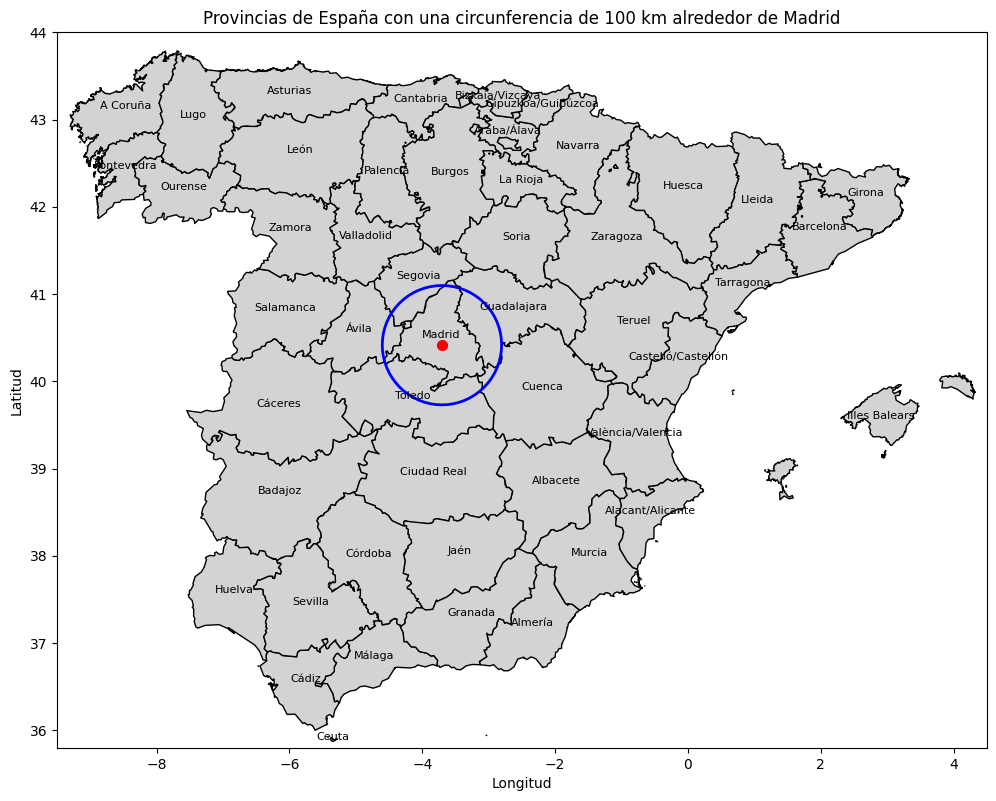

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Cargar el mapa de provincias de España
# Puedes descargar shapefiles detallados del Instituto Geográfico Nacional de España
# Para este ejemplo, usaremos un dataset genérico

# Descargar datos de provincias (este es un ejemplo, sustituye con tus datos locales si es necesario)
espana_provincias = gpd.read_file('https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/spain-provinces.geojson')

# Coordenadas de Madrid (centro de la circunferencia)
center_lat, center_lon = 40.4168, -3.7038
radius_km = 100  # Radio en kilómetros

# Crear un punto para el centro
center_point = gpd.GeoSeries([Point(center_lon, center_lat)], crs='EPSG:4326')

# Convertir a una proyección métrica para calcular distancias en km
center_point_proj = center_point.to_crs(epsg=3857)

# Crear la circunferencia (buffer en metros)
circle = center_point_proj.buffer(radius_km * 1000)

# Convertir de nuevo a latitud/longitud
circle_latlon = circle.to_crs(epsg=4326)

# Plotear el mapa de España con provincias y la circunferencia
fig, ax = plt.subplots(figsize=(12, 12))
espana_provincias.plot(ax=ax, color='lightgray', edgecolor='black')
circle_latlon.plot(ax=ax, edgecolor='blue', facecolor='none', linewidth=2)
center_point.plot(ax=ax, color='red', markersize=50)

# Agregar nombres de las provincias
for idx, row in espana_provincias.iterrows():
    plt.annotate(text=row['name'], xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 horizontalalignment='center', fontsize=8, color='black')

# Ajustar los límites del mapa para enfocar en Madrid
ax.set_xlim(-9.5, 4.5)
ax.set_ylim(35.8, 44)

# Etiquetas y título
ax.set_title('Provincias de España con una circunferencia de 100 km alrededor de Madrid')
plt.xlabel('Longitud')
plt.ylabel('Latitud')

plt.show()


C:\Users\nicol\AppData\Local\Temp\ipykernel_39116\2424776597.py:67: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc='upper right')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


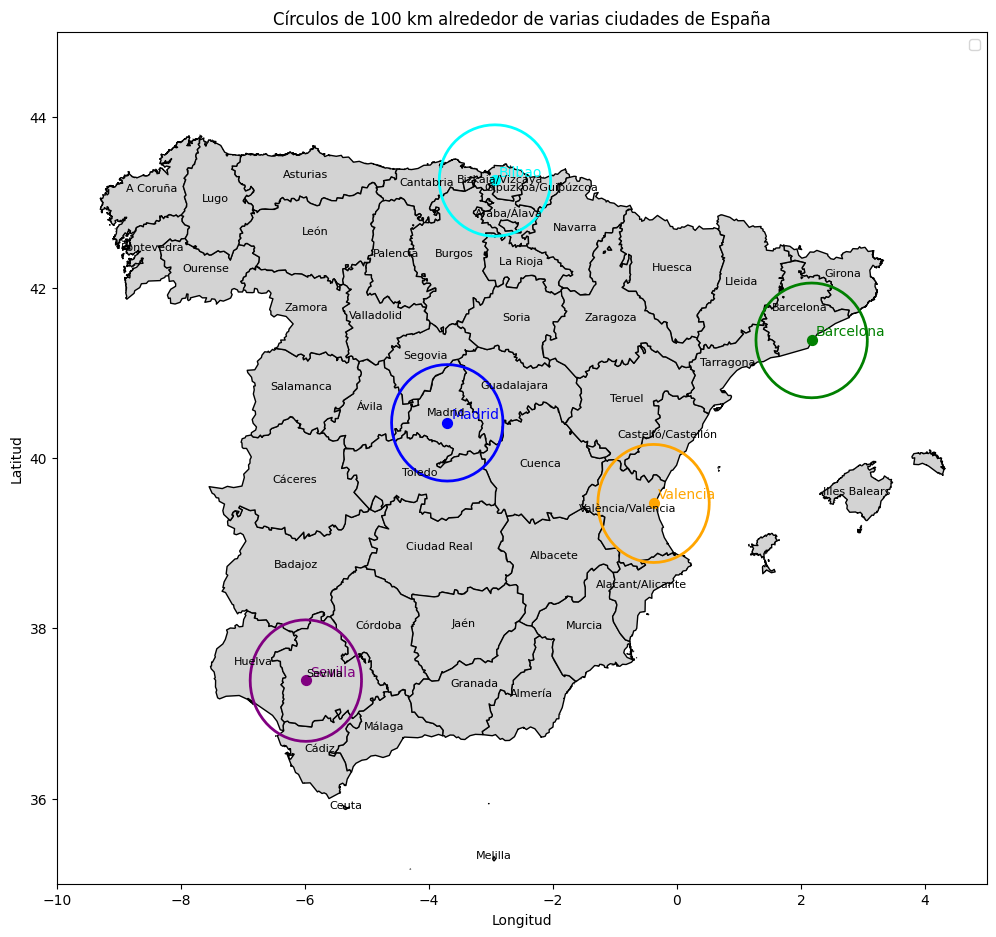

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import random

# Cargar el mapa de provincias de España
espana_provincias = gpd.read_file('https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/spain-provinces.geojson')

# Lista de puntos (nombre, latitud, longitud)
puntos = [
    ('Madrid', 40.4168, -3.7038),
    ('Barcelona', 41.3851, 2.1734),
    ('Valencia', 39.4699, -0.3763),
    ('Sevilla', 37.3891, -5.9845),
    ('Bilbao', 43.2630, -2.9350)
]

radius_km = 100  # Radio en kilómetros

# Crear una figura y ejes para el mapa
fig, ax = plt.subplots(figsize=(12, 12))

# Plotear el mapa base de España
espana_provincias.plot(ax=ax, color='lightgray', edgecolor='black')

# Colores para los círculos
colores = ['blue', 'green', 'orange', 'purple', 'cyan']

# Iterar sobre los puntos y dibujar los círculos
for i, (nombre, lat, lon) in enumerate(puntos):
    color = colores[i % len(colores)]  # Seleccionar color

    # Crear punto
    punto = gpd.GeoSeries([Point(lon, lat)], crs='EPSG:4326')

    # Convertir a proyección métrica para calcular distancias en km
    punto_proj = punto.to_crs(epsg=3857)

    # Crear la circunferencia (buffer en metros)
    circulo = punto_proj.buffer(radius_km * 1000)

    # Convertir de nuevo a latitud/longitud
    circulo_latlon = circulo.to_crs(epsg=4326)

    # Dibujar el círculo y el punto
    circulo_latlon.plot(ax=ax, edgecolor=color, facecolor='none', linewidth=2, label=f'{nombre} ({radius_km} km)')
    punto.plot(ax=ax, color=color, markersize=50)

    # Anotar el nombre de la ciudad
    plt.annotate(nombre, xy=(lon, lat), xytext=(3, 3), textcoords='offset points', fontsize=10, color=color)

# Agregar nombres de las provincias
for idx, row in espana_provincias.iterrows():
    plt.annotate(text=row['name'], xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 horizontalalignment='center', fontsize=8, color='black')

# Ajustar los límites del mapa para mostrar todos los círculos
ax.set_xlim(-10, 5)
ax.set_ylim(35, 45)

# Etiquetas y título
ax.set_title('Círculos de 100 km alrededor de varias ciudades de España')
plt.xlabel('Longitud')
plt.ylabel('Latitud')

# Agregar leyenda
plt.legend(loc='upper right')

# Mostrar el mapa
plt.show()


C:\Users\nicol\AppData\Local\Temp\ipykernel_39116\1368914526.py:71: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc='upper right')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


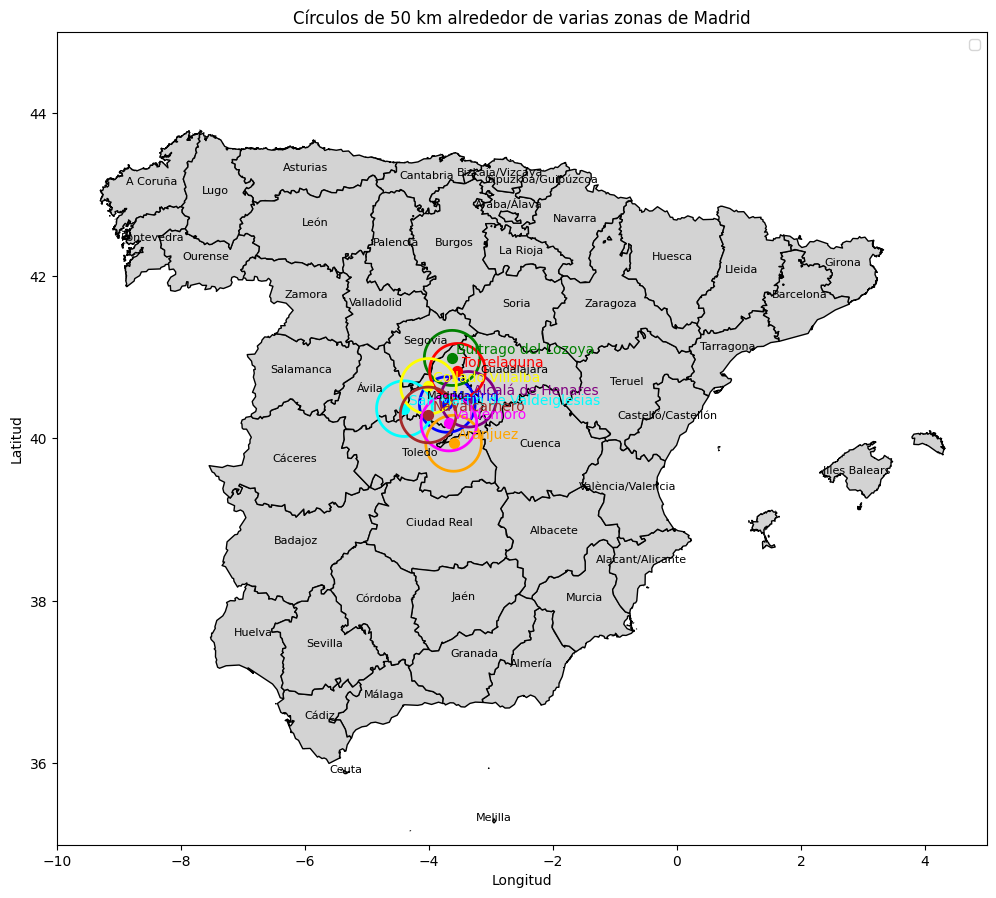

: 

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import random

# Cargar el mapa de provincias de España
espana_provincias = gpd.read_file('https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/spain-provinces.geojson')

# Lista de puntos para cubrir la provincia de Madrid
puntos = [
    ('Madrid', 40.4168, -3.7038),
    ('Buitrago del Lozoya', 40.9900, -3.6250),
    ('Aranjuez', 39.9400, -3.6020),
    ('Alcalá de Henares', 40.4810, -3.3635),
    ('San Martín de Valdeiglesias', 40.3660, -4.3950),
    ('Torrelaguna', 40.8280, -3.5400),
    ('Collado Villalba', 40.6420, -4.0070),
    ('Valdemoro', 40.1890, -3.6780),
    ('Navalcarnero', 40.2890, -4.0120)
]

radius_km = 50  # Radio en kilómetros

# Crear una figura y ejes para el mapa
fig, ax = plt.subplots(figsize=(12, 12))

# Plotear el mapa base de España
espana_provincias.plot(ax=ax, color='lightgray', edgecolor='black')

# Colores para los círculos
colores = ['blue', 'green', 'orange', 'purple', 'cyan', 'red', 'yellow', 'magenta', 'brown']

# Iterar sobre los puntos y dibujar los círculos
for i, (nombre, lat, lon) in enumerate(puntos):
    color = colores[i % len(colores)]  # Seleccionar color

    # Crear punto
    punto = gpd.GeoSeries([Point(lon, lat)], crs='EPSG:4326')

    # Convertir a proyección métrica para calcular distancias en km
    punto_proj = punto.to_crs(epsg=3857)

    # Crear la circunferencia (buffer en metros)
    circulo = punto_proj.buffer(radius_km * 1000)

    # Convertir de nuevo a latitud/longitud
    circulo_latlon = circulo.to_crs(epsg=4326)

    # Dibujar el círculo y el punto
    circulo_latlon.plot(ax=ax, edgecolor=color, facecolor='none', linewidth=2, label=f'{nombre} ({radius_km} km)')
    punto.plot(ax=ax, color=color, markersize=50)

    # Anotar el nombre de la ciudad
    plt.annotate(nombre, xy=(lon, lat), xytext=(3, 3), textcoords='offset points', fontsize=10, color=color)

# Agregar nombres de las provincias
for idx, row in espana_provincias.iterrows():
    plt.annotate(text=row['name'], xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 horizontalalignment='center', fontsize=8, color='black')

# Ajustar los límites del mapa para mostrar todos los círculos
ax.set_xlim(-10, 5)
ax.set_ylim(35, 45)

# Etiquetas y título
ax.set_title('Círculos de 50 km alrededor de varias zonas de Madrid')
plt.xlabel('Longitud')
plt.ylabel('Latitud')

# Agregar leyenda
plt.legend(loc='upper right')

# Mostrar el mapa
plt.show()
